In [1]:
!python -V

Python 3.12.9


In [2]:
import pandas as pd

In [3]:
import pickle

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import root_mean_squared_error
import numpy as np

In [6]:
df = pd.read_parquet('./data/yellow_tripdata_2023-01.parquet')

len(df.columns)
# df.dtypes

19

In [7]:
df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
df['duration'] = df.duration.apply(lambda td: td.total_seconds() / 60)

In [8]:
sd = np.std(df['duration'])
print('Std Dev: ', sd)
# print(df.dtypes)

Std Dev:  42.59434429744777


In [9]:
df['duration'].describe(percentiles=[.90, .92, .95, .98])

count    3.066766e+06
mean     1.566900e+01
std      4.259435e+01
min     -2.920000e+01
50%      1.151667e+01
90%      2.794167e+01
92%      3.055000e+01
95%      3.646667e+01
98%      4.873333e+01
max      1.002918e+04
Name: duration, dtype: float64

In [10]:
df = df[(df.duration >= 1) & (df.duration <= 60)]

df['PULocationID'] = df['PULocationID'].astype(str)
df['DOLocationID'] = df['DOLocationID'].astype(str)

categories = ['PULocationID', 'DOLocationID']
# df['PU_DO'] = df['PULocationID'].astype(str) + '_' + df['DOLocationID'].astype(str)

onehot = df[categories].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(onehot)

In [11]:
print(X_train.shape)
print(df.dtypes)

(3009173, 515)
VendorID                          int64
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                     object
DOLocationID                     object
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
duration                        float64
dtype: object


In [12]:
print(dv.feature_names_)

['DOLocationID=1', 'DOLocationID=10', 'DOLocationID=100', 'DOLocationID=101', 'DOLocationID=102', 'DOLocationID=106', 'DOLocationID=107', 'DOLocationID=108', 'DOLocationID=109', 'DOLocationID=11', 'DOLocationID=111', 'DOLocationID=112', 'DOLocationID=113', 'DOLocationID=114', 'DOLocationID=115', 'DOLocationID=116', 'DOLocationID=117', 'DOLocationID=118', 'DOLocationID=119', 'DOLocationID=12', 'DOLocationID=120', 'DOLocationID=121', 'DOLocationID=122', 'DOLocationID=123', 'DOLocationID=124', 'DOLocationID=125', 'DOLocationID=126', 'DOLocationID=127', 'DOLocationID=128', 'DOLocationID=129', 'DOLocationID=13', 'DOLocationID=130', 'DOLocationID=131', 'DOLocationID=132', 'DOLocationID=133', 'DOLocationID=134', 'DOLocationID=135', 'DOLocationID=136', 'DOLocationID=137', 'DOLocationID=138', 'DOLocationID=139', 'DOLocationID=14', 'DOLocationID=140', 'DOLocationID=141', 'DOLocationID=142', 'DOLocationID=143', 'DOLocationID=144', 'DOLocationID=145', 'DOLocationID=146', 'DOLocationID=147', 'DOLoc

In [13]:
y_train = df.duration.values
y_train

array([ 8.43333333,  6.31666667, 12.75      , ..., 24.51666667,
       13.        , 14.4       ], shape=(3009173,))

In [14]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

rsme = root_mean_squared_error(y_train, y_pred)

sd = rsme/np.sqrt(2)

print(f'rsme: {rsme:.3f}\nsd: {sd:.3f}')


rsme: 7.649
sd: 5.409


/var/folders/55/g997z85s50xbgykjv0llhnz80000gp/T/ipykernel_11428/1672306066.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
/var/folders/55/g997z85s50xbgykjv0llhnz80000gp/T/ipykernel_11428/1672306066.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, lab

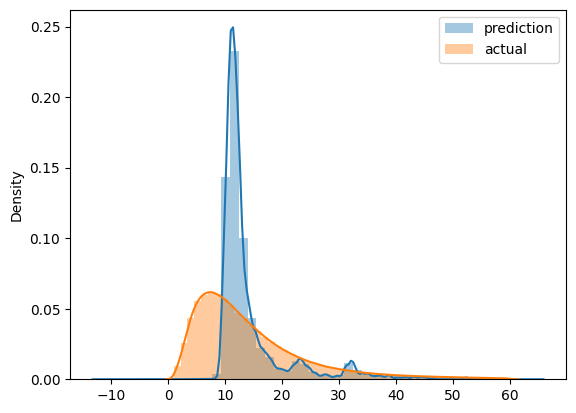

In [15]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [16]:
df_val = pd.read_parquet('./data/yellow_tripdata_2023-02.parquet')


In [17]:
df_val['duration'] = df_val.tpep_dropoff_datetime - df_val.tpep_pickup_datetime
df_val['duration'] = df_val.duration.apply(lambda t: t.total_seconds()/60)

df_val = df_val[(df_val.duration >= 1) & (df_val.duration <= 60)]

> Have to reshape the training and validation sets for training, otherwise y'all get the error:
ValueError: X has 519 features, but LinearRegression is expecting 515 features as input.


In [18]:
df_val.PULocationID = df_val.PULocationID.apply(str)
df_val.DOLocationID = df_val.DOLocationID.apply(str)

In [27]:
# categorical = ['PULocationID', 'DOLocationID']
# dv = DictVectorizer()
# val_dicts = df_val[categorical].to_dict(orient='records')

# X_val = dv.fit_transform(val_dicts)

df['PU_DO'] = df['PULocationID'] + '_' + df['DOLocationID']
df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']

categorical = ['PULocationID', 'DOLocationID'] #['PU_DO'] #['PULocationID', 'DOLocationID'] # #
numerical = ['trip_distance']

dv = DictVectorizer()

train_dicts = df[categorical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [28]:
print(X_train.shape)
print(X_val.shape)

(3009173, 515)
(2855951, 515)


In [29]:
target = 'duration'
y_val = df_val[target].values

In [31]:
lr2 = LinearRegression()
lr2.fit(X_train, y_train)

y_val_pred = lr2.predict(X_val)

rsme = root_mean_squared_error(y_val, y_val_pred)

sd = rsme / np.sqrt(2)

print(f'rsme: {rsme}\nstd. dev: {sd}')

rsme: 7.811818743246608
std. dev: 5.5237900067498495
